# File handling tools

In [1]:
%load_ext autoreload
%autoreload 2
LOGGERDEFINED = False

In [2]:
import os
import sys
sys.path.append("../")
from py.config import cfg
import py.fileHandling as fh
import py.logs as logs
import py.vidRead as vr
import py.vidDroplet as vd
import py.vidMorph as vm
from py.imshow import imshow
LOGGERDEFINED = logs.openLog('fileHandling.ipynb', LOGGERDEFINED, level='DEBUG', exportLog=True)

In [3]:
import cv2 as cv
import numpy as np
import imutils
import random as rng
import matplotlib.pyplot as plt

In [4]:
import pandas as pd

In [200]:
import multiprocessing as mp

In [201]:
tlist = fh.makeTestList(cfg.path.vids)

In [204]:
for t in tlist:
    fh.tanalyze(t)

INFO: //cfs2e.nist.gov/642/internal/Rheology Lab/Linkam/Friedrich\210615 mineral LapRD\M4_2.25_p0
INFO: //cfs2e.nist.gov/642/internal/Rheology Lab/Linkam/Friedrich\210615 mineral LapRD\M5_2.25_p0
INFO: //cfs2e.nist.gov/642/internal/Rheology Lab/Linkam/Friedrich\210615 mineral LapRD\M5_2.50_p0
INFO: //cfs2e.nist.gov/642/internal/Rheology Lab/Linkam/Friedrich\210615 mineral LapRD\M5_2.75_p0
INFO: //cfs2e.nist.gov/642/internal/Rheology Lab/Linkam/Friedrich\210615 mineral LapRD\M5_3.00_p0
INFO: //cfs2e.nist.gov/642/internal/Rheology Lab/Linkam/Friedrich\210615 mineral LapRD\M5_3.50_p0
INFO: //cfs2e.nist.gov/642/internal/Rheology Lab/Linkam/Friedrich\210615 mineral LapRD\M5_4.00_p0
INFO: //cfs2e.nist.gov/642/internal/Rheology Lab/Linkam/Friedrich\210615 mineral LapRD\M6_2.25_p0
INFO: //cfs2e.nist.gov/642/internal/Rheology Lab/Linkam/Friedrich\210615 mineral LapRD\M7_2.25_p0
INFO: //cfs2e.nist.gov/642/internal/Rheology Lab/Linkam/Friedrich\210615 mineral LapRD\M8_2.25_p0
INFO: //cfs2e.nist.g

In [20]:
f = r'C:\Users\lmf1\OneDrive - National Institute of Standards and Technology (NIST)\NIST\data\material properties\surface tension\shear cell\relaxation\M0S_2.75T'
t1 = fh.combineRelax(f)
t1.to_csv(r'C:\Users\lmf1\OneDrive - National Institute of Standards and Technology (NIST)\NIST\data\material properties\surface tension\shear cell\relaxation\M0S_2.75T\M0S_2.75T_all_\relax_M0S_2.75T_all_.csv')

In [21]:
t1

,dropNum,b,c,r2,w2,l2,r0,sigma,vid
0.0,266.0,-2.630357,2.445987,0.200714,0.000203,0.000207,0.000102,0.001047,266
1.0,266.0,4.520570,-6.886063,0.208751,0.000203,0.000207,0.000102,0.000559,266
2.0,266.1,-0.238860,-0.267905,0.970281,0.000384,0.000443,0.000201,0.000187,266
3.0,266.1,0.146528,-0.896565,0.971251,0.000384,0.000443,0.000201,0.000036,266
0.0,161.19,-1.299529,-0.471450,0.913357,0.000209,0.000210,0.000105,0.000530,161
...,...,...,...,...,...,...,...,...,...
6.0,632.3,-0.531900,-2.617619,0.186853,0.000275,0.000280,0.000138,0.000287,632
7.0,632.3,0.836228,2.021963,0.186677,0.000275,0.000280,0.000138,0.000140,632
8.0,632.34,-0.969402,-0.876695,0.755240,0.000196,0.000198,0.000098,0.000371,632
9.0,632.34,1.562263,-0.843105,0.753894,0.000196,0.000198,0.000098,0.000186,632


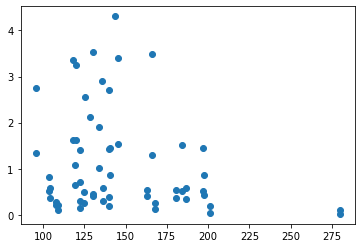

In [25]:
t2 = t1[t1.r2>0.95]
plt.scatter(t2['r0']*10**6, t2['sigma']*1000)

In [197]:
fh.analyzeParallel(cfg.path.vids)

In [290]:
fh.analyzeRecursive(cfg.path.vids)

Droplet: {'name': 'M0S', 'base': 'mineral oil', 'rheModifier': 'fumed silica', 'surfactant': 'Span 20', 'rheWt': 0.0, 'tau0': 100000.0, 'k': 0.0, 'n': 0.0, 'eta0': 0.025842070967741937}
Matrix: {'name': '2.75T', 'base': 'water', 'rheModifier': 'Laponite RD', 'surfactant': 'Tween 80', 'rheWt': 2.75, 'tau0': 0.183228, 'k': 4.295523102, 'n': 0.153900242, 'eta0': 3.22334}
Profile:
     mode  gap strain rate freq direction time
0   stdy  500    n/a   20  n/a        cw    1
1   stdy  500    n/a   20  n/a       acw    1
2  relax  500    n/a    0  n/a       n/a  100
Videos: ['Basler acA2040-90uc (21726010)_20210804_094911266.mp4', 'Basler acA2040-90uc (21726010)_20210804_095140161.mp4', 'Basler acA2040-90uc (21726010)_20210804_095340615.mp4', 'Basler acA2040-90uc (21726010)_20210804_095440924.mp4', 'Basler acA2040-90uc (21726010)_20210804_095550979.mp4', 'Basler acA2040-90uc (21726010)_20210804_095638101.mp4', 'Basler acA2040-90uc (21726010)_20210804_095740545.mp4', 'Basler acA2040-90uc (21726

In [15]:
t = fh.Test(os.path.join(cfg.path.vids, 'steady', '210616 mineralS LapRDT','M4S_2.75T_p4'))

In [68]:
t.analyze()

Droplet: {'name': '2.25', 'base': 'water', 'rheModifier': 'Laponite RD', 'surfactant': '', 'rheWt': 2.25, 'tau0': 0.337681, 'k': 6.44154447, 'n': 0.082530337, 'eta0': 5.19063}
Matrix: {'name': 'M6', 'base': 'mineral oil', 'rheModifier': 'fumed silica', 'surfactant': '', 'rheWt': 6.0, 'tau0': 0.483139, 'k': 2.334965954, 'n': 0.471946879, 'eta0': 7.69126}
Profile:
     mode  gap strain rate freq direction time
0   stdy  500    n/a    1  n/a        cw    5
1   stdy  500    n/a    1  n/a       acw    5
2   stdy  500    n/a    3  n/a        cw    4
3   stdy  500    n/a    3  n/a       acw    4
4   stdy  500    n/a    5  n/a        cw    2
5   stdy  500    n/a    5  n/a       acw    2
6   stdy  500    n/a   10  n/a        cw    2
7   stdy  500    n/a   10  n/a       acw    2
8   stdy  500    n/a   15  n/a        cw    2
9   stdy  500    n/a   15  n/a       acw    2
10  stdy  500    n/a   20  n/a        cw    2
11  stdy  500    n/a   20  n/a       acw    2
Videos: ['Basler acA2040-90uc (21726

C:\Users\lmf1\Documents\GitHub\shearCellTensiometry\py\vidDroplet.py:840: RuntimeWarning: divide by zero encountered in double_scalars
  sigma = 1/fit['b'] # N/m


INFO: Exported C:/Users/lmf1/OneDrive - National Institute of Standards and Technology (NIST)/NIST/data/material properties/surface tension/shear cell\2.25_M6\sigmaFits_2.25_M6_20210804_164615396.png
INFO: --------------
INFO: //cfs2e.nist.gov/642/internal/Rheology Lab/Linkam/Friedrich\210804 LapRD mineral\2.25_M6_p5\Basler acA2040-90uc (21726010)_20210804_164728880.mp4
INFO: Analyzing frame 0/1073, [1073]
INFO: Analyzing frame 100/1073, [1073]
INFO: Analyzing frame 200/1073, [1073]
INFO: Analyzing frame 300/1073, [1073]
INFO: Analyzing frame 400/1073, [1073]
INFO: Analyzing frame 500/1073, [1073]
INFO: Analyzing frame 600/1073, [1073]
INFO: Analyzing frame 700/1073, [1073]
INFO: Analyzing frame 800/1073, [1073]
INFO: Analyzing frame 900/1073, [1073]
INFO: Analyzing frame 1000/1073, [1073]
INFO: Consolidating droplets
INFO: Determining baseline
INFO: Splitting times
INFO: Summarizing droplets
INFO: Getting sigma
INFO: Exported C:/Users/lmf1/OneDrive - National Institute of Standards an

AttributeError: 'dropletTracker' object has no attribute 'moveTimes'

In [210]:
t.prnt()

Droplet: {'name': 'M4S', 'base': 'mineral oil', 'rheModifier': 'fumed silica', 'surfactant': 'Span 20', 'rheWt': 4.0, 'tau0': 0.18871, 'k': 0.640731304, 'n': 0.511230738, 'eta0': 2.35373}
Matrix: {'name': '2.75T', 'base': 'water', 'rheModifier': 'Laponite RD', 'surfactant': 'Tween 80', 'rheWt': 2.75, 'tau0': 0.183228, 'k': 4.295523102, 'n': 0.153900242, 'eta0': 3.22334}
Profile:
     mode  gap strain rate freq direction time
0   stdy  500    n/a    1  n/a        cw    8
1   stdy  500    n/a    2  n/a       acw    6
2   stdy  500    n/a    3  n/a        cw    4
3   stdy  500    n/a    4  n/a       acw    3
4   stdy  500    n/a    5  n/a        cw    2
5   stdy  500    n/a    6  n/a       acw    2
6   stdy  500    n/a    8  n/a        cw    2
7   stdy  500    n/a   10  n/a       acw    2
8   stdy  500    n/a   12  n/a        cw    2
9   stdy  500    n/a   16  n/a       acw    1
10  stdy  500    n/a   20  n/a        cw    1
11  stdy  500    n/a   30  n/a       acw    1
12  stdy  500    n/

In [185]:
vi0.profile.table

,mode,gap,strain,rate,freq,direction,time
0,stdy,750,n/a,50,n/a,cw,2
1,stdy,750,n/a,50,n/a,acw,2
2,relax,750,n/a,0,n/a,n/a,100


In [16]:
vi0 = vr.vidInfo(t,0)

In [18]:
vi0.loadAll()

//cfs2e.nist.gov/642/internal/Rheology Lab/Linkam/Friedrich\steady\210616 mineralS LapRDT\M4S_2.75T_p4\Basler acA2040-90uc (21726010)_20210616_111445244.mp4
INFO: Determining baseline
INFO: Splitting times
//cfs2e.nist.gov/642/internal/Rheology Lab/Linkam/Friedrich\steady\210616 mineralS LapRDT\M4S_2.75T_p4\Basler acA2040-90uc (21726010)_20210616_111445244.mp4
//cfs2e.nist.gov/642/internal/Rheology Lab/Linkam/Friedrich\steady\210616 mineralS LapRDT\M4S_2.75T_p4\Basler acA2040-90uc (21726010)_20210616_111445244.mp4
//cfs2e.nist.gov/642/internal/Rheology Lab/Linkam/Friedrich\steady\210616 mineralS LapRDT\M4S_2.75T_p4\Basler acA2040-90uc (21726010)_20210616_111445244.mp4


In [213]:
vi0.analyze()

In [140]:
vi0.dTabs.relabeledDroplets.dropNum.unique()

array([11., 22.,  2.,  8.,  5.,  6.,  7.,  9., 12., 29., 16., 28., 31.,
       33.])

In [216]:
vd.summarizeDroplet(vi0.dTabs, 8, vi0.mppx, vi0.droplet, vi0.matrix, diag=1)

,frame,time,dropNum,x,y,dpos,v,w,l,angle,vest
1269,964.0,19.28,8.0,571.128906,897.763733,-1.19129,-59.5643,270.402344,306.408752,177.146591,9.384490e+07
1272,966.0,19.32,8.0,578.706665,722.052429,-87.442,-4372.1,269.028961,307.737091,175.963013,9.329675e+07
1274,967.0,19.34,8.0,580.495728,635.574585,-86.4963,-4324.82,269.923279,308.810028,177.720337,9.424551e+07
1276,968.0,19.36,8.0,579.473633,551.719543,-83.8613,-4193.06,270.001587,308.579803,176.021988,9.422990e+07
1278,969.0,19.38,8.0,575.145325,469.252686,-82.5804,-4129.02,270.257599,307.748688,175.767105,9.415441e+07
1281,970.0,19.40,8.0,568.223694,383.375732,-86.1554,-4307.77,271.294922,309.182587,173.420319,9.532064e+07
1283,971.0,19.42,8.0,559.996033,298.497894,-16.7243,-836.217,271.404022,309.549530,171.269318,9.551054e+07
1285,972.0,19.44,8.0,549.121826,217.776474,-83.3487,-4167.43,269.928864,305.710327,168.886200,9.330338e+07


{'dropNum': 8,
 'N': 8,
 'gdotrad': 125.66370614359172,
 'gdotHz': 20.0,
 'etad': 0.42929905473789737,
 'etam': 0.5041860910298747,
 'lam': 0.8514694522036309,
 'k': 1.2091229544711455,
 'w': 0.0006060094106357729,
 'l': 0.0006905063919956909,
 'v': -0.0073962962714616805,
 'gdotHzest': 14.79259254292336,
 'gdotHzerr': 0.260370372853832,
 'r0': 7.6e-05,
 'grem': 0.0005668246751914794,
 'D': 0.0651723497611208,
 'gr': 0.0011242370332621755,
 'Dte': 0.11900113139045286,
 'g2': 218.82079414095182,
 'rzr0r0': 517123271.70024425,
 'gem': 7.458219410414203,
 'srrrk': -1}

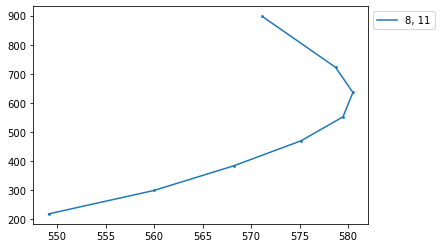

In [181]:
vd.dropData(8, vi0.dTabs.relabeledDroplets[vi0.dTabs.relabeledDroplets.dropNum==8], vi0.dTabs.moveTimes.loc[11], vi0.droplet, vi0.matrix, 0.000076, vi0.mppx, diag=2)

In [145]:
vi0.getRelaxation()

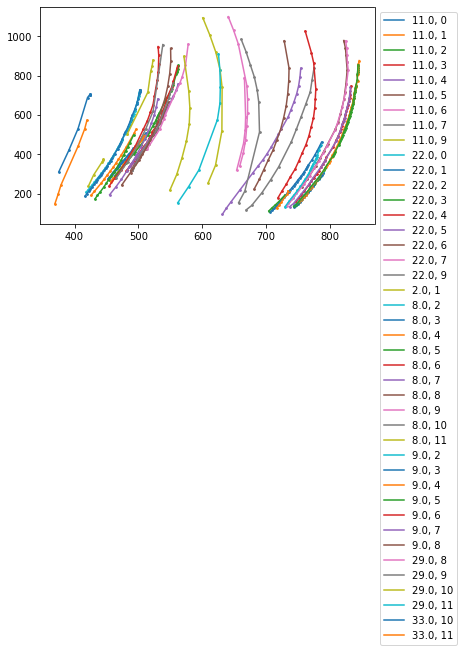

In [183]:
vi0.summarizeDroplets(diag=1)

In [131]:
vi0.dTabs.readFrames(startFrame=984, endFrame=985, diag=3)

INFO: Analyzing frame 984/985, [1126]
985.0 0


,dropNum,newindex,oldindex,dd,dpos,dframe,v,dvol,dposnorm,fit
0,14.0,0,0,921.049528,38.377064,24.0,1918.853184,0.016916,inf,1.0


,frame,time,dropNum,x,y,dpos,v,w,l,angle,vest
1476,985.0,19.7,14.0,525.607788,1057.17627,0.0,0.0,67.100166,67.829704,1.544628,1.279251e+06


,frame,time,dropNum,x,y,dpos,v,w,l,angle,vest
1267,960.0,19.20,14.0,374.147430,196.857254,-48.077666,-2403.883276,68.948380,69.368668,19.244986,1.381338e+06
1268,961.0,19.22,14.0,369.231720,149.498596,-47.613094,-2380.654680,66.799751,67.302650,20.203104,1.257971e+06
1269,964.0,19.28,18.0,571.128906,897.763733,-1.191286,-59.564318,270.402344,306.408752,177.146591,9.384490e+07
1270,965.0,19.30,18.0,576.411865,809.464294,-88.457337,-4422.866856,269.520203,307.972717,176.887360,9.370947e+07
1271,966.0,19.32,17.0,609.178894,1073.578003,-0.518393,-25.919645,181.885971,189.336929,9.609218,2.623749e+07
1272,966.0,19.32,18.0,578.706665,722.052429,-87.441982,-4372.099121,269.028961,307.737091,175.963013,9.329675e+07
1273,967.0,19.34,17.0,618.871948,992.477356,-81.677844,-4083.892212,184.029999,194.322525,5.347227,2.756697e+07
1274,967.0,19.34,18.0,580.495728,635.574585,-86.496348,-4324.817421,269.923279,308.810028,177.720337,9.424551e+07
1276,968.0,19.36,18.0,579.473633,551.719543,-83.861270,-4193.063517,270.001587,308.579803,176.021988,9.422990e+07
1275,968.0,19.36,17.0,625.255798,910.634583,-82.091370,-4104.568524,184.130783,195.985107,1.879950,2.783329e+07


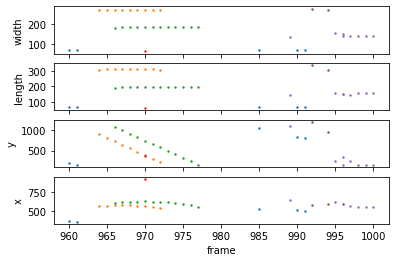

In [134]:
dt = vi0.dTabs.dropletTab.copy()
xmin = 960
xmax = 1000
dt = dt[(dt.frame>=xmin)&(dt.frame<=xmax)]
display(dt.sort_values(by='frame'))
vi0.plotDroplets(False, 'frame', xmin=xmin, xmax=xmax)


In [308]:
vi0.file

'//cfs2e.nist.gov/642/internal/Rheology Lab/Linkam/Friedrich\\210616 mineralS LapRDT\\M4S_2.75T_p4\\Basler acA2040-90uc (21726010)_20210616_112000586.mp4'

In [412]:
sumall = fh.combineSummaries(os.path.join(cfg.path.export, 'M4S_2.75T'))
sumall

,dropNum,N,gdotrad,gdotHz,etad,etam,lam,k,w,l,...,r0,grem,D,gr,Dte,g2,rzr0r0,gem,srrrk,vid
0.0,087.0,160.0,6.283185,1.0,0.829441,4.478751,0.185195,0.870977,0.000214,0.000216,...,0.000107,0.000489,0.003485,0.000109,0.000756,1.039486,1.336494e+05,4.566320,-1.000000,087
1.0,087.0,83.0,12.566371,2.0,0.550961,2.481156,0.222058,0.898782,0.000214,0.000217,...,0.000107,0.000545,0.005398,0.000220,0.002104,4.212616,1.124982e+05,5.092488,-1.000000,087
2.0,087.0,54.0,18.849556,3.0,0.437422,1.756678,0.249005,0.918131,0.000214,0.000218,...,0.000107,0.000603,0.007436,0.000343,0.004081,10.272719,8.885372e+04,5.630343,-1.000000,087
3.0,087.0,44.0,25.132741,4.0,0.372570,1.375077,0.270945,0.933312,0.000214,0.000218,...,0.000107,0.000611,0.008746,0.000445,0.006116,17.245009,-8.135841e+04,5.710298,295.248567,087
4.0,087.0,24.0,31.415927,5.0,0.329512,1.137216,0.289753,0.945939,0.000214,0.000218,...,0.000107,0.000680,0.011083,0.000598,0.009352,31.214698,-2.195276e+05,6.353637,481.740449,087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15.0,586.2,12.0,50.265482,8.0,0.255474,0.762359,0.335110,0.975002,0.000342,0.000369,...,0.000174,0.000815,0.037497,0.001069,0.046974,37.772212,-5.381607e+05,4.685388,742.939261,586
16.0,586.2,13.0,62.831853,10.0,0.226796,0.630555,0.359677,0.989975,0.000339,0.000379,...,0.000174,0.000870,0.055850,0.001379,0.084388,62.932489,-8.240757e+05,5.002194,912.370819,586
17.0,586.2,8.0,75.398224,12.0,0.205924,0.539981,0.381353,1.002767,0.000338,0.000378,...,0.000174,0.000917,0.056463,0.001699,0.099419,95.466427,-9.423258e+05,5.275989,969.394400,586
18.0,586.9,7.0,62.831853,10.0,0.226796,0.630555,0.359677,0.989975,0.000318,0.000343,...,0.000166,0.000738,0.038223,0.001171,0.057754,49.502466,-1.616087e+06,4.436460,1277.674596,586


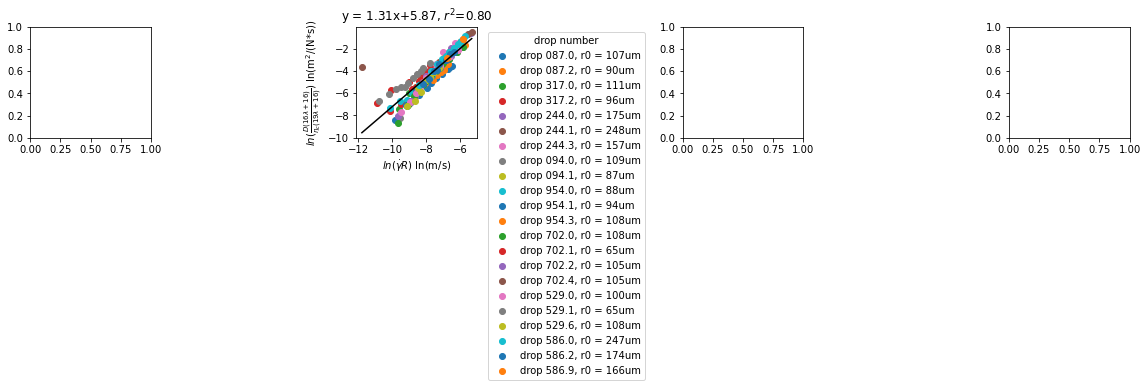

In [416]:
# sumall = fh.sumall(os.path.join(cfg.path.export, 'M4S_2.75T'))
ssmall = sumall[(sumall.r0<0.0005/2)]
# ssmall = ssmall[(ssmall.r0<0.000247)]
# ssmall = ssmall[ssmall.dropNum==3]
fig, axs = plt.subplots(1,4, figsize=(16,4))
tlist = [1]
for i in tlist:
    if i==0:
        x1 = ssmall.gr
        y1 = ssmall.Dte
        axs[i].set_xlabel(r'$\dot{\gamma}R$ (m/s)')
        axs[i].set_ylabel(r'$\frac{D(16\lambda+16)}{\eta_c(19\lambda+16)}$ (m$^2$/(N*s))')
    elif i==1:
        x1 = [np.log(j) for j in ssmall.gr]
        y1 = [np.log(j) for j in ssmall.Dte]
        axs[i].set_xlabel(r'$ln(\dot{\gamma}R)$ ln(m/s)')
        axs[i].set_ylabel(r'$ln(\frac{D(16\lambda+16)}{\eta_c(19\lambda+16)})$ ln(m$^2$/(N*s))')
    elif i==2:
        x1 = ssmall.gr**(5/3)
        y1 = ssmall.Dte
        axs[i].set_xlabel(r'$(\dot{\gamma}R)^{5/3}$ $(m/s)^{5/3}$')
        axs[i].set_ylabel(r'$\frac{D(16\lambda+16)}{\eta_c(19\lambda+16)}$ (m$^2$/(N*s))')
    elif i==3:
        x1 = ssmall.gdotHzest
        y1 = ssmall.Dte
        axs[i].set_xlabel(r'$\dot{\gamma}$ (1/s)')
        axs[i].set_ylabel(r'$\frac{D(16\lambda+16)}{\eta_c(19\lambda+16)}$ (m$^2$/(N*s))')
    x1 = list(x1)
    y1 = list(y1)
    if i==0:
        lr = vd.linearReg(x1, y1, intercept=0)
    else:
        lr = vd.linearReg(x1, y1)
    title = "y = {:.2f}x+{:.2f}, $r^2$={:.2f}".format(lr['b'],lr['c'],lr['rsq'])
    axs[i].set_title(title) 
    x = [min(x1), max(x1)]
    y = [lr['b']*i+lr['c'] for i in x]
    for dn in ssmall.dropNum.unique():
        x2 = [x1[j] for j in range(len(x1)) if ssmall.iloc[j]['dropNum']==dn]
        y2 = [y1[j] for j in range(len(y1)) if ssmall.iloc[j]['dropNum']==dn]
        r0 = ssmall[ssmall.dropNum==dn].iloc[0]['r0']
        axs[i].scatter(x2, y2, label='drop {}, r0 = {:.0f}um'.format(dn, r0*10**6))
    axs[i].plot(x,y, color='black')
axs[tlist[-1]].legend(bbox_to_anchor=(1.05, 1),loc='upper left', title='drop number')
fig.tight_layout()

In [422]:
# sumall = fh.sumall(os.path.join(cfg.path.export, 'M4S_2.75T'))
ssmall = sumall[(sumall.r0<0.0005/2)]
# ssmall = ssmall[(ssmall.r0<0.000247)]
# ssmall = ssmall[ssmall.dropNum==3]
out = []
for dn in ssmall.dropNum.unique():
    ssmall2 = ssmall[ssmall.dropNum==dn]
    x1 = [np.log(j) for j in ssmall2.gr]
    y1 = [np.log(j) for j in ssmall2.Dte]
    lr = vd.linearReg(x1, y1)
    if len(lr)>0:
        out.append({'dropNum':dn, 'r0':ssmall2.iloc[0]['r0']*10**6, 'n':lr['b'], 'rsq':lr['rsq']})
powers = pd.DataFrame(out)
powers

,dropNum,r0,n,rsq
0,087.0,107.041492,1.409704,0.989506
1,087.2,90.128754,1.331699,0.972380
2,317.0,111.393926,1.645120,0.983579
3,317.2,96.241261,1.662940,0.971158
4,244.0,174.835707,1.724735,0.984479
5,244.1,248.196603,1.534424,0.997952
6,094.0,109.036621,1.664035,0.980975
7,954.0,87.630804,1.398827,0.980215
8,954.1,94.051896,1.831509,0.989738
9,702.0,107.818371,1.722828,0.975878


Text(0, 0.5, 'Scaling ($(\\dot{\\gamma}R)^n$)')

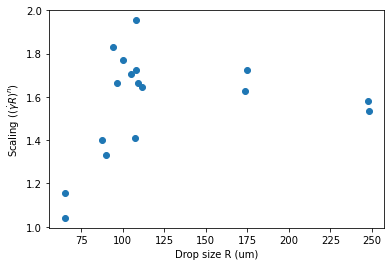

In [423]:
plt.scatter(powers['r0'], powers['n'])
plt.xlabel('Drop size R (um)')
plt.ylabel('Scaling ($(\dot{\gamma}R)^n$)')

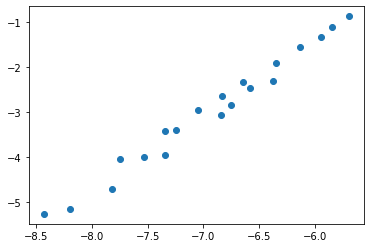

In [265]:
plt.scatter([np.log(i) for i in vi0.summary.gr], [np.log(i) for i in vi0.summary.Dte])

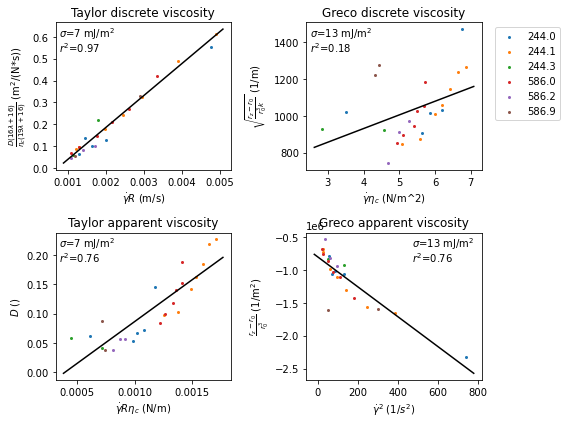

In [430]:
# sumall = vi0.summary
ssmall = sumall[(sumall.r0<0.0005/2)]
ssmall = sumall[(sumall.r0>0.000150)]
# ssmall = ssmall[(ssmall.gdotHzerr<0.25)]
# ssmall = ssmall[(ssmall.gdotHz>5)]
ssmall = ssmall[(ssmall.gr>0.001)]
# ssmall = ssmall[(ssmall.grem>0.0012)]
# ssmall = ssmall[(ssmall.dropNum==0)]
sp = vr.summaryPlot()
for dn in ssmall.dropNum.unique():
    sp.plotSummary(ssmall[ssmall.dropNum==dn], label=dn)
for i in [1,2,3,4]:
    fit = vd.sigmaFit(ssmall, i, intercept='')
    sp.plotFit(fit)
# quadfit = vd.quadReg(ssmall.gr, ssmall.Dte)
# quadfit2 = {'mode':1}
# quadfit = {**quadfit2, **quadfit}
# sp.plotFit(quadfit)
sp.clean()
sp.fig

[((482.21185302734375, 991.8092651367188),
  (49.578365325927734, 75.28855895996094),
  167.71743774414062),
 ((531.30126953125, 601.6746826171875),
  (67.51691436767578, 67.91202545166016),
  82.05391693115234),
 ((813.1575317382812, 457.9262390136719),
  (152.73971557617188, 153.546630859375),
  24.809511184692383),
 ((414.97320556640625, 196.1428680419922),
  (265.837646484375, 272.4179992675781),
  171.54705810546875)]

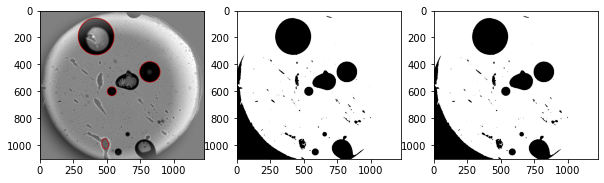

In [341]:
vi0.detectDropletOneFrame(frameNum=378, diag=True)

# summaries

In [19]:
relaxall = []
sigmaall = []
for sample in os.listdir(cfg.path.export):
    ff = os.path.join(cfg.path.export,sample)
    relax = os.path.join(ff, 'relax_'+sample+'_all_.csv')
    if os.path.exists(relax):
        r, d = vr.plainIm(relax, 0)
        r['sample'] = [sample for i in range(len(r))]
        if len(relaxall)==0:
            relaxall = r
        else:
            relaxall = pd.concat([relaxall, r])
    sigma = os.path.join(ff, 'sigma_'+sample+'_all_.csv')
    if os.path.exists(sigma):
        r, d = vr.plainIm(sigma, 0)
        r['sample'] = [sample for i in range(len(r))]
        if len(sigmaall)==0:
            sigmaall = r
        else:
            sigmaall = pd.concat([sigmaall, r])

In [68]:
import matplotlib.pyplot as plt

[1.1102993392639369, 0.3967441794739174, 0.05255005031904245]


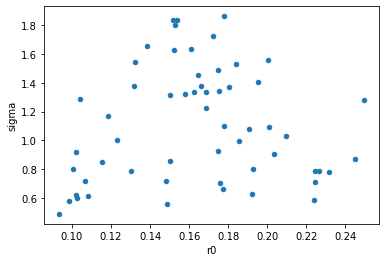

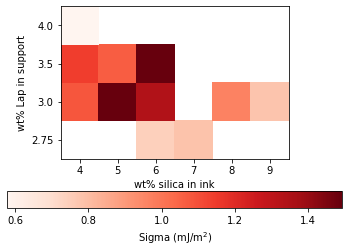

In [77]:
small = relaxall[(relaxall.r0<0.5*0.0005)&(relaxall.r2>0.9)]
small = vr.removeOutliers(small, 'sigma')
small.sigma = 1000*small.sigma
small.r0 = 1000*small.r0
m = small.sigma.mean()
stdev = small.sigma.std()
s = small.sigma.sem()
print([m,stdev,s])
small.plot.scatter('r0', 'sigma')
split = []
for x in range(4,10):
    for y in ['2.25', '2.50', '2.75', '3.00', '3.50', '4.00']:
        s2 = small[small['sample']==('M'+str(x)+'S_'+y+'T')]
        split.append({'ink':x, 'sup':float(y), 'sigma':s2.sigma.mean(), 'sigmaerr':s2.sigma.sem()})
split = pd.DataFrame(split)
piv = pd.pivot_table(split, index='sup', columns='ink', values='sigma')
# piv = piv.fillna(0)
fig, ax = plt.subplots()
ax.set_aspect('equal')
heatmap = ax.pcolormesh(piv, cmap=plt.cm.Reds, alpha=1)
ax.set_yticks(np.arange(piv.shape[0]) + 0.5, minor=False)
ax.set_xticks(np.arange(piv.shape[1]) + 0.5, minor=False)
ax.set_xticklabels(piv.columns, minor=False)
ax.set_yticklabels(piv.index, minor=False)
ax.set_xlabel('wt% silica in ink')
ax.set_ylabel('wt% Lap in support')
plt.colorbar(mappable=heatmap, orientation='horizontal', label='Sigma (mJ/m$^2$)')

[2.318251306719695, 1.26120849855907, 0.630604249279535]


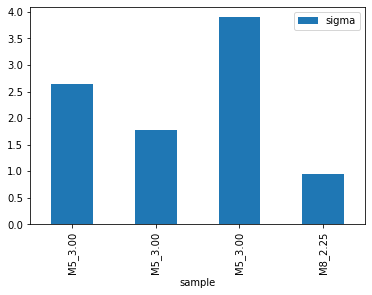

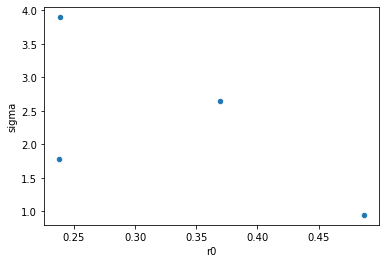

In [59]:
small = relaxall[[not 'T' in i for i in relaxall['sample']]]
small = vr.removeOutliers(small, 'sigma')
small.sigma = 1000*small.sigma
small.r0 = 1000*small.r0
m = small.sigma.mean()
stdev = small.sigma.std()
s = small.sigma.sem()
print([m,stdev,s])
small.plot.bar('sample', 'sigma')
small.plot.scatter('r0', 'sigma')

C:\Users\lmf1\Miniconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,mode,sigma,slope,intercept,r2,sample
0.0,1.0,46.828620,21.354463,0.0,0.907150,M5S_4.00T
0.0,1.0,24.698558,40.488194,0.0,0.920518,M5_2.25
0.0,1.0,306.173265,3.266124,0.0,0.844336,M5_3.50
0.0,1.0,44.281794,22.582644,0.0,0.815149,M8S_2.75T


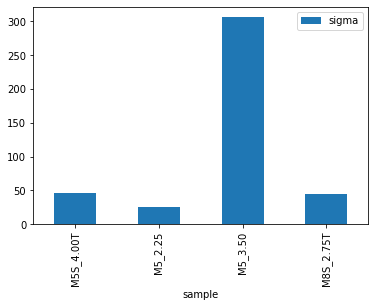

In [64]:
fit = sigmaall[(sigmaall.r2>0.8)]
fit.sigma = 1000*fit.sigma
fit.plot.bar('sample', 'sigma')
fit

In [300]:
folder = r'C:\Users\lmf1\OneDriveNIST\NIST\data\material properties\surface tension\shear cell\waterT_M0S'
sumall = []
for f in os.listdir(folder):
    f1 = os.path.join(folder, f)
    if 'summary' in f1:
        r, d = vr.plainIm(f1, 0)
        if len(sumall)==0:
            sumall = r
            di = d
        else:
            sumall = pd.concat([sumall, r])

In [302]:
sumall

,dropNum,gdotrad,gdotHz,etad,etam,lam,k,w,l,v,gdotHzest,r0,grem,D,gr,Dte,g2,rzr0r0,gem,srrrk
0.0,0.0,6.283185,1.0,0.00149,0.025842,0.057651,0.760891,0.000232,0.000242,0.000092,0.183796,0.000147,0.000004,0.021025,0.000147,0.805377,1.0,-9.734593e+06,0.025842,3576.823713
1.0,0.0,6.283185,1.0,0.00149,0.025842,0.057651,0.760891,0.000234,0.000243,-0.000150,-0.299196,0.000147,0.000004,0.019755,0.000147,0.756733,1.0,-9.375669e+06,0.025842,3510.263942
2.0,0.0,12.566371,2.0,0.00149,0.025842,0.057651,0.760891,0.000216,0.000229,0.049634,99.267836,0.000147,0.000008,0.027777,0.000293,1.064005,4.0,-1.217999e+07,0.051684,4000.940065
3.0,1.0,6.283185,1.0,0.00149,0.025842,0.057651,0.760891,0.000131,0.000148,0.000000,0.000000,0.000063,0.000002,0.062533,0.000063,2.395347,1.0,8.892278e+06,0.025842,-1.000000
4.0,1.0,6.283185,1.0,0.00149,0.025842,0.057651,0.760891,0.000120,0.000128,-0.000395,-0.789011,0.000063,0.000002,0.030930,0.000063,1.184762,1.0,-1.230497e+07,0.025842,4021.415055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5141.0,70.0,125.663706,20.0,0.00149,0.025842,0.057651,0.760891,0.000179,0.000187,-0.009379,-18.758671,0.000096,0.000050,0.022301,0.001923,0.854240,400.0,-7.481299e+06,0.516841,3135.646934
5142.0,71.0,125.663706,20.0,0.00149,0.025842,0.057651,0.760891,0.000218,0.000227,-0.013645,-27.290032,0.000157,0.000081,0.020195,0.003140,0.773582,400.0,-1.240545e+07,0.516841,4037.800434
5143.0,72.0,125.663706,20.0,0.00149,0.025842,0.057651,0.760891,0.000152,0.000169,-0.002213,-4.426858,0.000078,0.000040,0.053823,0.001559,2.061705,400.0,-4.075889e+06,0.516841,2314.460639
5144.0,73.0,125.663706,20.0,0.00149,0.025842,0.057651,0.760891,0.000181,0.000193,-0.000398,-0.795543,0.000097,0.000050,0.031915,0.001932,1.222524,400.0,-6.769509e+06,0.516841,2982.752491


In [303]:
sumall['gdotHzerr'] = [(abs(row['gdotHzest'])-row['gdotHz'])/row['gdotHz'] for i,row in sumall.iterrows()]
di['gdotHzerr'] = ''
vr.exportPD(os.path.join(folder, 'summary_waterT_M0S_all.csv'), sumall, di, True)

INFO: Exported C:\Users\lmf1\OneDriveNIST\NIST\data\material properties\surface tension\shear cell\waterT_M0S\summary_waterT_M0S_all.csv


In [259]:
vi0.dTabs.bounds

{}

In [295]:
ssmall

,dropNum,gdotrad,gdotHz,etad,etam,lam,k,w,l,v,gdotHzest,r0,grem,D,gr,Dte,g2,rzr0r0,gem,srrrk
0.0,0.0,6.283185,1.0,0.00149,0.025842,0.057651,0.760891,0.000232,0.000242,0.000092,0.183796,0.000147,0.000004,0.021025,0.000147,0.805377,1.0,-9.734593e+06,0.025842,3576.823713
1.0,0.0,6.283185,1.0,0.00149,0.025842,0.057651,0.760891,0.000234,0.000243,-0.000150,-0.299196,0.000147,0.000004,0.019755,0.000147,0.756733,1.0,-9.375669e+06,0.025842,3510.263942
2.0,0.0,12.566371,2.0,0.00149,0.025842,0.057651,0.760891,0.000216,0.000229,0.049634,99.267836,0.000147,0.000008,0.027777,0.000293,1.064005,4.0,-1.217999e+07,0.051684,4000.940065
3.0,1.0,6.283185,1.0,0.00149,0.025842,0.057651,0.760891,0.000131,0.000148,0.000000,0.000000,0.000063,0.000002,0.062533,0.000063,2.395347,1.0,8.892278e+06,0.025842,-1.000000
4.0,1.0,6.283185,1.0,0.00149,0.025842,0.057651,0.760891,0.000120,0.000128,-0.000395,-0.789011,0.000063,0.000002,0.030930,0.000063,1.184762,1.0,-1.230497e+07,0.025842,4021.415055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66.0,70.0,125.663706,20.0,0.00149,0.025842,0.057651,0.760891,0.000179,0.000187,-0.009379,-18.758671,0.000096,0.000050,0.022301,0.001923,0.854240,400.0,-7.481299e+06,0.516841,3135.646934
67.0,71.0,125.663706,20.0,0.00149,0.025842,0.057651,0.760891,0.000218,0.000227,-0.013645,-27.290032,0.000157,0.000081,0.020195,0.003140,0.773582,400.0,-1.240545e+07,0.516841,4037.800434
68.0,72.0,125.663706,20.0,0.00149,0.025842,0.057651,0.760891,0.000152,0.000169,-0.002213,-4.426858,0.000078,0.000040,0.053823,0.001559,2.061705,400.0,-4.075889e+06,0.516841,2314.460639
69.0,73.0,125.663706,20.0,0.00149,0.025842,0.057651,0.760891,0.000181,0.000193,-0.000398,-0.795543,0.000097,0.000050,0.031915,0.001932,1.222524,400.0,-6.769509e+06,0.516841,2982.752491


In [311]:
import vidDroplet as vd

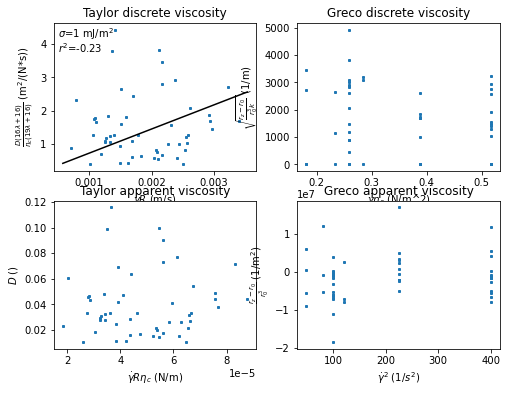

In [324]:
ssmall = sumall[(sumall.r0<0.005/3)&(sumall.r0>0.0001)]
ssmall = ssmall[(ssmall.gdotHzerr<0.05)&(ssmall.gdotHzerr>-0.05)]
ssmall = ssmall[(ssmall.gdotHz>5)]
ssmall = ssmall[(ssmall.Dte<5)]
fit = vd.sigmaFit(ssmall, 1, intercept=0)
sp = vr.summaryPlot()
sp.plotSummary(ssmall)
sp.plotFit(fit)
sp.fig